In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

**1. Load the dataset and visualize the time series data.**

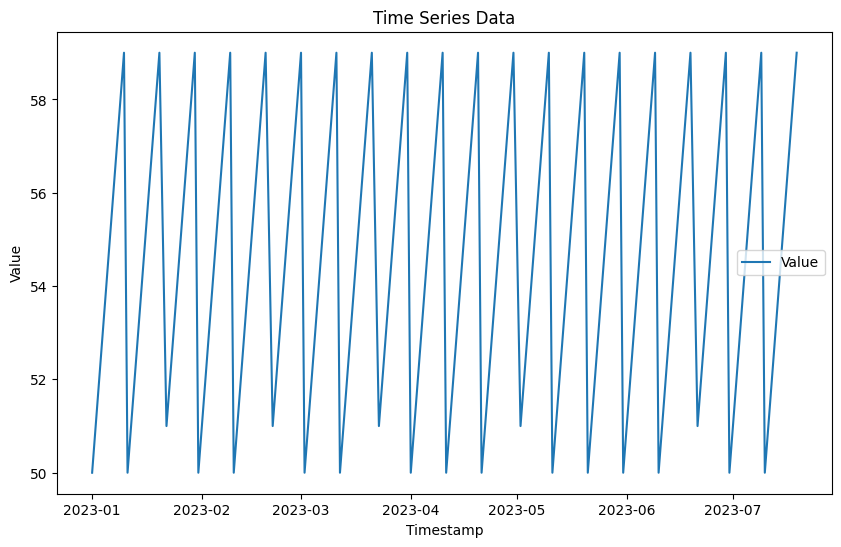

In [19]:
df = pd.read_csv('Anomaly_Detection.csv', parse_dates=['timestamp'])
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.title('Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

 **2. Perform data preprocessing (handle missing values, if any).**

In [20]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

**3. Apply a rolling window method to detect anomalies in the dataset.**

In [21]:
rolling_mean = df['value'].rolling(window=5).mean()
rolling_std = df['value'].rolling(window=5).std()
df['rolling_anomaly'] = np.where(np.abs(df['value'] - rolling_mean) > 2 * rolling_std, 1, 0)

**4. Use Z-score method to identify anomalies.**

In [22]:
df['z_score'] = zscore(df['value'])
df['zscore_anomaly'] = np.where(np.abs(df['z_score']) > 2, 1, 0)

**5. Apply the Isolation Forest algorithm to detect anomalies.**

In [23]:
isolation_forest = IsolationForest(contamination=0.05)
df['if_anomaly'] = isolation_forest.fit_predict(df[['value']])
df['if_anomaly'] = np.where(df['if_anomaly'] == -1, 1, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


**6. Visualize the anomalies detected by the rolling window method.**

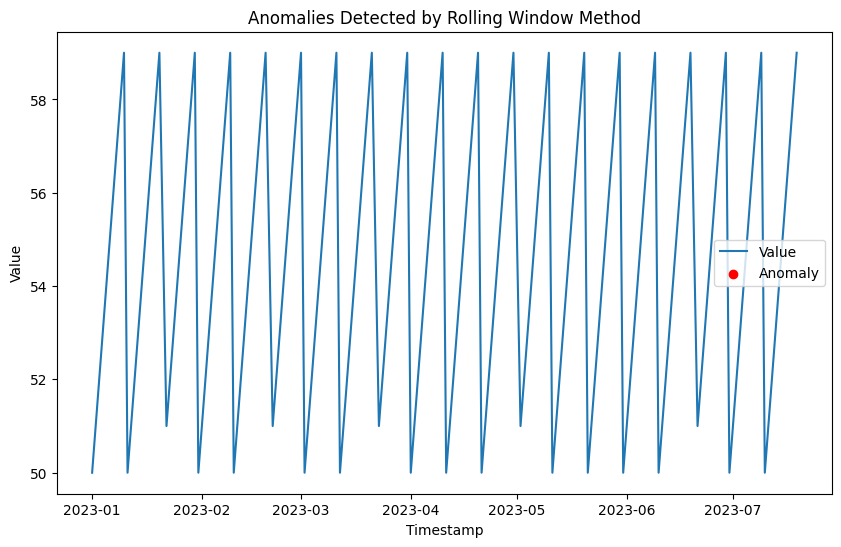

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.scatter(df['timestamp'][df['rolling_anomaly'] == 1], df['value'][df['rolling_anomaly'] == 1], color='red', label='Anomaly')
plt.title('Anomalies Detected by Rolling Window Method')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

**7.Visualize the anomalies detected by the Z-score method.**

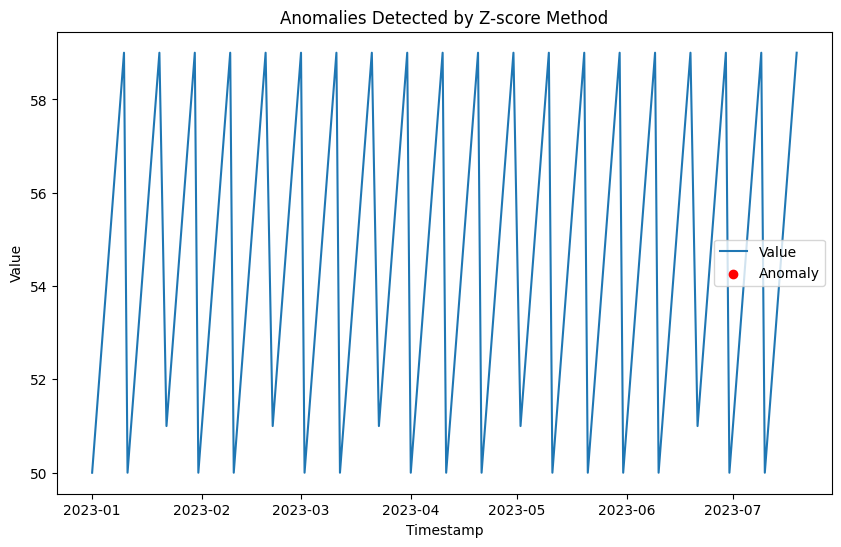

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.scatter(df['timestamp'][df['zscore_anomaly'] == 1], df['value'][df['zscore_anomaly'] == 1], color='red', label='Anomaly')
plt.title('Anomalies Detected by Z-score Method')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

**8. Visualize the anomalies detected by the Isolation Forest algorithm**

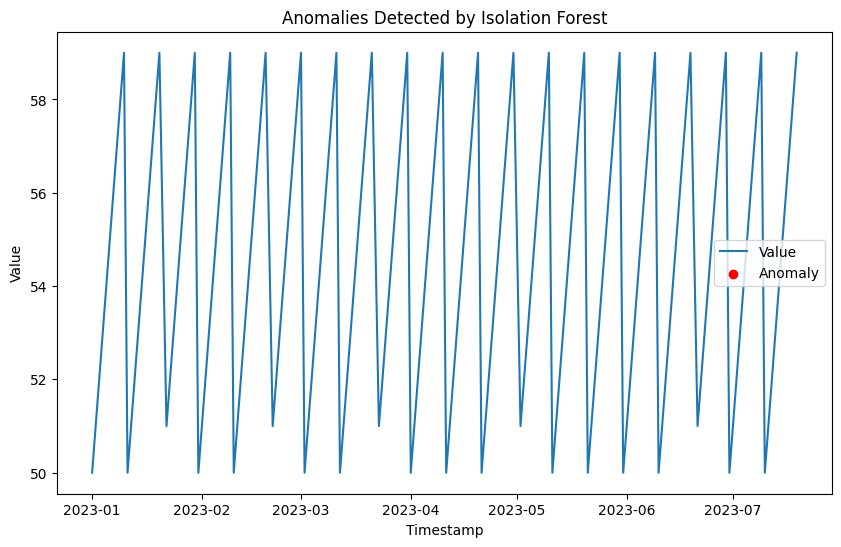

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.scatter(df['timestamp'][df['if_anomaly'] == 1], df['value'][df['if_anomaly'] == 1], color='red', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

**9. Compare the results of different anomaly detection methods**

In [27]:
print("Rolling Window Method Anomalies:")
print(df[df['rolling_anomaly'] == 1])
print("Z-score Method Anomalies:")
print(df[df['zscore_anomaly'] == 1])
print("Isolation Forest Anomalies:")
print(df[df['if_anomaly'] == 1])

Rolling Window Method Anomalies:
Empty DataFrame
Columns: [timestamp, value, rolling_anomaly, z_score, zscore_anomaly, if_anomaly]
Index: []
Z-score Method Anomalies:
Empty DataFrame
Columns: [timestamp, value, rolling_anomaly, z_score, zscore_anomaly, if_anomaly]
Index: []
Isolation Forest Anomalies:
Empty DataFrame
Columns: [timestamp, value, rolling_anomaly, z_score, zscore_anomaly, if_anomaly]
Index: []
